In [1]:
import numpy as np                                     # Matlab like syntax for linear algebra and functions
import matplotlib.pyplot as plt                        # Plots and figures like you know them from Matlab
import seaborn as sns                                  # Make the plots nicer to look at
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
import sys                                             # Module to see files and folders in directories
from scipy import stats
import pandas as pd
from sympy import *
import os

sys.path.append('../../External_Functions')
from ExternalFunctions import UnbinnedLH, BinnedLH, Chi2Regression
from ExternalFunctions import nice_string_output, add_text_to_ax, add_header_to_ax

In [98]:
path = "../../Project/BallOnIncline/Ball_measurements/"
listdir = os.listdir(path)
bigballdf = pd.read_csv(path + listdir[0], names = ["Time (s)"], skiprows = 15, usecols=[0])
smallballdf = pd.read_csv(path + listdir[10], names = ["Time (s)"], skiprows = 15, usecols=[0])

for file in listdir:
    if "Bigball" in file:
        name = file.replace(".csv", "")
        bigballdf[name.replace("Bigball", "") + " V"] = pd.read_csv(path + file, skiprows=14, usecols=[1])
    if "Smallball" in file:
        name = file.replace(".csv", "")
        smallballdf[name.replace("Smallball", "") + " V"] = pd.read_csv(path + file, skiprows=14, usecols=[1])
        
display(bigballdf)

,Time (s),1 V,1_turned V,2 V,2_turned V,3 V,3_turned V,4 V,4_turned V,5 V,5_turned V
0,-0.5000,0.789345,0.78968,0.789680,0.789680,0.789680,0.789680,0.78968,0.78968,0.790014,0.789345
1,-0.4998,0.789345,0.78968,0.789680,0.789680,0.789345,0.789680,0.78968,0.78968,0.790014,0.789680
2,-0.4996,0.789345,0.78968,0.789680,0.789680,0.789345,0.789680,0.78968,0.78968,0.790014,0.789680
3,-0.4994,0.789345,0.78968,0.789680,0.789680,0.789345,0.789345,0.78968,0.78968,0.790014,0.789680
4,-0.4992,0.789345,0.78968,0.789680,0.789680,0.789345,0.789345,0.78968,0.78968,0.790014,0.789345
...,...,...,...,...,...,...,...,...,...,...,...
24995,4.4990,0.789345,0.78968,0.789345,0.789680,0.789345,0.790014,0.78968,0.78968,0.790014,0.789680
24996,4.4992,0.789345,0.78968,0.789680,0.789345,0.789680,0.789680,0.78968,0.78968,0.789680,0.789680
24997,4.4994,0.789345,0.78968,0.789680,0.789345,0.789345,0.790014,0.78968,0.78968,0.789680,0.789680
24998,4.4996,0.789345,0.78968,0.789680,0.789680,0.789345,0.790014,0.78968,0.78968,0.789680,0.789680


,1 V,1_turned V,2 V,2_turned V,3 V,3_turned V,4 V,4_turned V,5 V,5_turned V,Time (s)
0,0.789345,0.790014,0.790014,0.789345,0.789345,0.78968,0.789680,0.789680,0.789345,0.789680,-0.5000
1,0.789680,0.790014,0.790014,0.789345,0.789345,0.78968,0.789345,0.789680,0.789345,0.789680,-0.4998
2,0.789680,0.790014,0.790014,0.789680,0.789345,0.78968,0.789680,0.789680,0.789345,0.790014,-0.4996
3,0.789680,0.790014,0.790014,0.789680,0.789345,0.78968,0.789680,0.789680,0.789345,0.790014,-0.4994
4,0.789680,0.790014,0.790014,0.789680,0.789345,0.78968,0.789345,0.789680,0.789345,0.790014,-0.4992
...,...,...,...,...,...,...,...,...,...,...,...
24995,0.789680,0.790014,0.789680,0.789680,0.789680,0.78968,0.789680,0.789680,0.789680,0.789345,4.4990
24996,0.789345,0.790014,0.790014,0.790014,0.790014,0.78968,0.789680,0.789680,0.789680,0.789345,4.4992
24997,0.789680,0.790014,0.790014,0.790014,0.790014,0.78968,0.789680,0.789345,0.789680,0.789680,4.4994
24998,0.789680,0.790014,0.790014,0.790014,0.789680,0.78968,0.789680,0.789680,0.789680,0.789680,4.4996


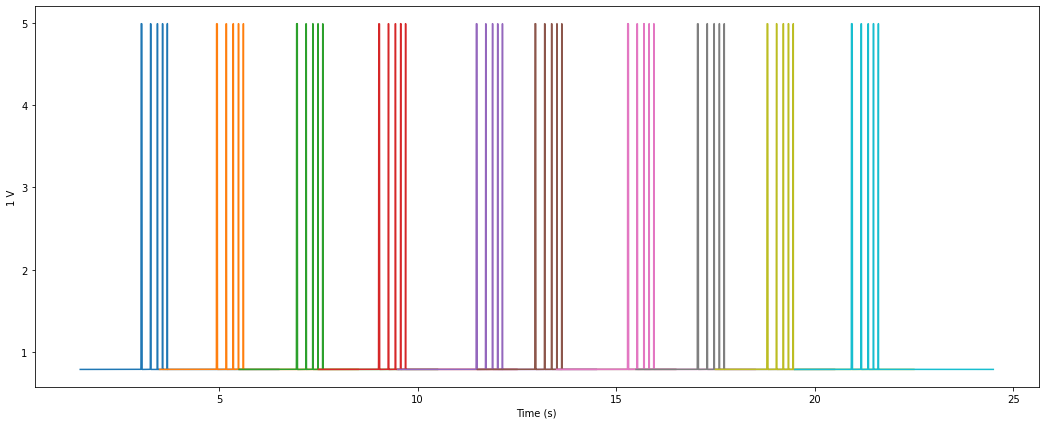

In [51]:
fig, ax = plt.subplots(figsize = (18,7), facecolor = "white")

tempdf = bigballdf.copy()

for col in tempdf.keys()[1:]:
    tempdf["Time (s)"] += 2
    sns.lineplot(x = "Time (s)", y = col, data = tempdf, ax = ax)
plt.show()

In [139]:
bigballpeaks = np.zeros((5, len(bigballdf.keys()[1:])))
bigballpeakerrors = np.zeros((5, len(bigballdf.keys()[1:])))

smallballpeaks = np.zeros((5, len(smallballdf.keys()[1:])))
smallballpeakerrors = np.zeros((5, len(smallballdf.keys()[1:])))

for dataframe, peakmatrix, errormatrix in zip([smallballdf, bigballdf], [smallballpeaks, bigballpeaks], [smallballpeakerrors, bigballpeakerrors]):
    for cidx, col in enumerate(dataframe.keys()[1:]):
        hm = (max(dataframe[col]) - min(dataframe[col])) / 2
        mask = dataframe[col] > hm
        
        time = dataframe["Time (s)"][mask].to_numpy()
        
        split = (time[1:] - time[:-1]) > 0.001
        splitidex = np.where(split)[0] + 1
        
        time = np.split(time, splitidex)
        for tidx, t in enumerate(time):
            mean = np.mean(t)
            std = np.std(t, ddof =1)
            sigmamean = std / np.sqrt(len(t))
            peakmatrix[tidx, cidx] = mean
            errormatrix[tidx, cidx] = sigmamean
            
indexlist = ["peak 1", "peak 2", "peak 3", "peak 4", "peak 5"]   
peakdf_bigball = pd.DataFrame(data = bigballpeaks, columns = bigballdf.keys()[1:], index=indexlist, dtype=float)
errordf_bigball = pd.DataFrame(data = bigballpeakerrors, columns = bigballdf.keys()[1:], index=indexlist, dtype=float)
peakdf_smallball = pd.DataFrame(data = smallballpeaks, columns = smallballdf.keys()[1:], index=indexlist, dtype=float)
errordf_smallball = pd.DataFrame(data = bigballpeakerrors, columns = smallballdf.keys()[1:], index=indexlist, dtype=float)
display(peakdf_bigball)
display(peakdf_smallball)

,1 V,1_turned V,2 V,2_turned V,3 V,3_turned V,4 V,4_turned V,5 V,5_turned V
peak 1,1.0428,0.9426,0.9579,1.0270,1.4848,0.9633,1.2982,1.0562,0.8079,0.9355
peak 2,1.2731,1.1784,1.1888,1.2632,1.7150,1.1994,1.5286,1.2913,1.0388,1.1721
peak 3,1.4437,1.3532,1.3596,1.4384,1.8856,1.3745,1.6994,1.4660,1.2096,1.3473
peak 4,1.5734,1.4862,1.4893,1.5714,2.0150,1.5074,1.8290,1.5986,1.3392,1.4803
peak 5,1.6930,1.6087,1.6088,1.6941,2.1344,1.6299,1.9485,1.7211,1.4587,1.6029


,1 V,1_turned V,2 V,2_turned V,3 V,3_turned V,4 V,4_turned V,5 V,5_turned V
peak 1,0.8281,0.7998,0.7770,0.9613,0.7806,1.0254,0.8985,1.0975,0.9348,0.9539
peak 2,1.0635,1.0417,1.0119,1.2019,1.0150,1.2655,1.1350,1.3387,1.1695,1.1948
peak 3,1.2379,1.2207,1.1862,1.3807,1.1892,1.4439,1.3100,1.5175,1.3437,1.3736
peak 4,1.3705,1.3563,1.3185,1.5166,1.3217,1.5796,1.4430,1.6533,1.4762,1.5091
peak 5,1.4918,1.4818,1.4406,1.6419,1.4424,1.7049,1.5654,1.7786,1.5982,1.6342


In [197]:
tableparams = pd.read_table("../../Project/BallOnIncline/Ballparameters.csv", delimiter=';', decimal=',', skiprows=1)
rails = tableparams.filter(regex = " rail")
rails = rails.drop(["Width rail (mm)", "width rail error (mm)"], axis = 1)
railmask = np.arange(0, len(rails.keys()), 2)
errormask = np.arange(1, len(rails.keys()), 2)
raildf = rails.iloc[:, railmask]
railerrordf = rails.iloc[:, errormask]
display(raildf)
display(railerrordf)

,Length1 rail (cm),Length2 rail (cm),Length3 rail (cm),Length4 rail (cm),Length5 rail (cm),Length1 rail mes2 (cm),Length2 rail mes2 (cm),Length3 rail mes2 (cm),Length4 rail mes2 (cm),Length5 rail mes2 (cm)
0,20.55,37.10,54.75,71.20,88.80,20.55,37.15,54.75,71.20,88.90
1,20.55,37.15,54.75,71.25,88.85,20.56,37.14,54.75,71.23,88.85
2,20.57,37.13,54.76,71.22,88.81,20.50,37.15,54.75,71.20,88.85


,Length1 rail error (cm),Length2 rail error (cm),Length3 rail error (cm),Length4 rail error (cm),Length5 rail error (cm),Length1 rail error mes2 (cm),Length2 rail error mes2 (cm),Length3 rail error mes2 (cm),Length4 rail error mes2 (cm),Length5 rail error mes2 (cm)
0,0.05,0.02,0.01,0.05,0.02,0.03,0.05,0.05,0.05,0.05
1,0.06,0.05,0.05,0.04,0.04,0.02,0.03,0.02,0.03,0.03
2,0.05,0.05,0.02,0.02,0.02,0.50,0.01,0.02,0.01,0.02


In [203]:
def weighted_mean(data, error):
    return np.sum((data / error**2)/np.sum(1 / error**2))

def weighted_std(error):
    return np.sqrt(1 / np.sum(1 / error**2))

def Chi2(data, error, mean = None):
    if mean == None:
        mean = np.mean(data)
    return np.sum(((data - mean) / error)**2)

def Chi2_p(data, error, mean = None):
    if mean == None:
        mean = np.mean(data)
    chi2_v = ((data - mean) / error)**2
    print(chi2_v)
    return sum(chi2_v)
#check if the data could come from the same setup (No change in setup).
#calculate weighted mean for mesurement 1
#calculate chi2 for both sets of data
railkeys = raildf.columns
sigmakeys = railerrordf.columns
hl = int(len(sigmakeys)/2)
chi2_me1 = 0
chi2_me2 = 0
for idx, (sigmacol, col) in enumerate(zip(sigmakeys[:hl], railkeys[:hl])):
    wm = weighted_mean(raildf[col], railerrordf[sigmacol])
    print(wm)
    chi2_me1 += Chi2(raildf[col], railerrordf[sigmacol], wm)
    chi2_me2 += Chi2_p(raildf.iloc[:, idx + hl], railerrordf.iloc[:, idx + hl], wm)
    print(Chi2(raildf.iloc[:, idx + hl], railerrordf.iloc[:, idx + hl], wm))
    
    
Ndof = hl - 1
prob_me1 = stats.chi2.sf(chi2_me1, Ndof)
prob_me2 = stats.chi2.sf(chi2_me2, Ndof)
print(prob_me1)
print(prob_me2)

20.557422680412373
0    0.061218
1    0.016606
2    0.013189
dtype: float64
0.09101388032732363
37.10969696969697
0     0.649734
1     1.020304
2    16.243343
dtype: float64
17.91338026731877
54.751937984496124
0    0.001502
1    0.009389
2    0.009389
dtype: float64
0.020281233098963194
71.22304964539006
0    0.212514
1    0.053675
2    5.312862
dtype: float64
5.579050908455819
88.81
0    3.240000
1    1.777778
2    4.000000
dtype: float64
9.017777777775724
0.5102670846848363
1.427730810010556e-06


In [ ]:
for dataframe in [raildf, railerrordf]:
    part1 = dataframe.iloc[:, np.arange(0, len(dataframe.columns)/2)]
    part2 = dataframe.iloc[:, np.arange(len(dataframe.columns)/2, len(dataframe.columns))]
    part2.columns = part1.columns
    dataframe = pd.concat([part1, part2], ignore_index = True)
    display(dataframe)
    display(raildf)
    
display(raildf)
display(railerrordf)

In [175]:
def weighted_mean(data, error):
    return np.sum((data / error**2)/np.sum(1 / error**2))

def weighted_std(error):
    return np.sqrt(1 / np.sum(1 / error**2))



In [22]:
test = pd.read_csv(path + listdir[3], skiprows=14)

display(test)

,Time (s),Channel 1 (V)
0,-0.5000,0.789680
1,-0.4998,0.789680
2,-0.4996,0.789680
3,-0.4994,0.789680
4,-0.4992,0.789680
...,...,...
24995,4.4990,0.789680
24996,4.4992,0.789345
24997,4.4994,0.789345
24998,4.4996,0.789680
